In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv('../../DataSets/Fin_singa/Individual_income/individuals-by-tax-group.csv')
dt

,year_of_assessment,tax_group,no_of_indv_assessed,total_income,donations,assessable_income
0,2004,Non-Taxable Group,1019375,18385892,90979,18294913
1,2004,Taxable Group,714843,53493055,163238,53329817
2,2005,Non-Taxable Group,797513,15578286,76568,15501718
3,2005,Taxable Group,731348,56015862,170457,55845405
4,2006,Non-Taxable Group,691441,14288278,143223,14145055
5,2006,Taxable Group,769599,61192026,180755,61011271
6,2007,Non-Taxable Group,665342,14540789,83833,14456956
7,2007,Taxable Group,856833,70184019,198205,69985814
8,2008,Non-Taxable Group,655892,14623836,94935,14528900
9,2008,Taxable Group,960815,84224700,262416,83962284


In [3]:
dt['Donation_Percentage'] = round((dt.donations/dt.total_income)*100,2)

In [4]:
df=pd.read_csv('../../DataSets/Fin_singa/Individual_income/individuals-tax-group.csv')
df

,year_of_assessment,tax_group,income_type,amount
0,2004,Non-Taxable Group,Dividends,1503637
1,2004,Non-Taxable Group,Employment Income,15118201
2,2004,Non-Taxable Group,Income from Trade and Profession,1240395
3,2004,Non-Taxable Group,Interest,101814
4,2004,Non-Taxable Group,Other Types,204313
...,...,...,...,...
219,2019,Taxable Group,Income from Trade and Profession,7427310
220,2019,Taxable Group,Interest,53849
221,2019,Taxable Group,Other Types,158287
222,2019,Taxable Group,Rent,4080891


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019] 

Enter start year of range:2009
Enter end year of range:2019

                     no_of_indv_assessed
year_of_assessment                     
2009                            1650385
2010                            1728186
2011                            1829400
2012                            1968605
2013                            2114924
2014                            2184698
2015                            2280528
2016                            2386718
2017                            2467000
2018                            2521445
2019                            2581396

Number of Individuals assessed during provided range of years: 23713285 



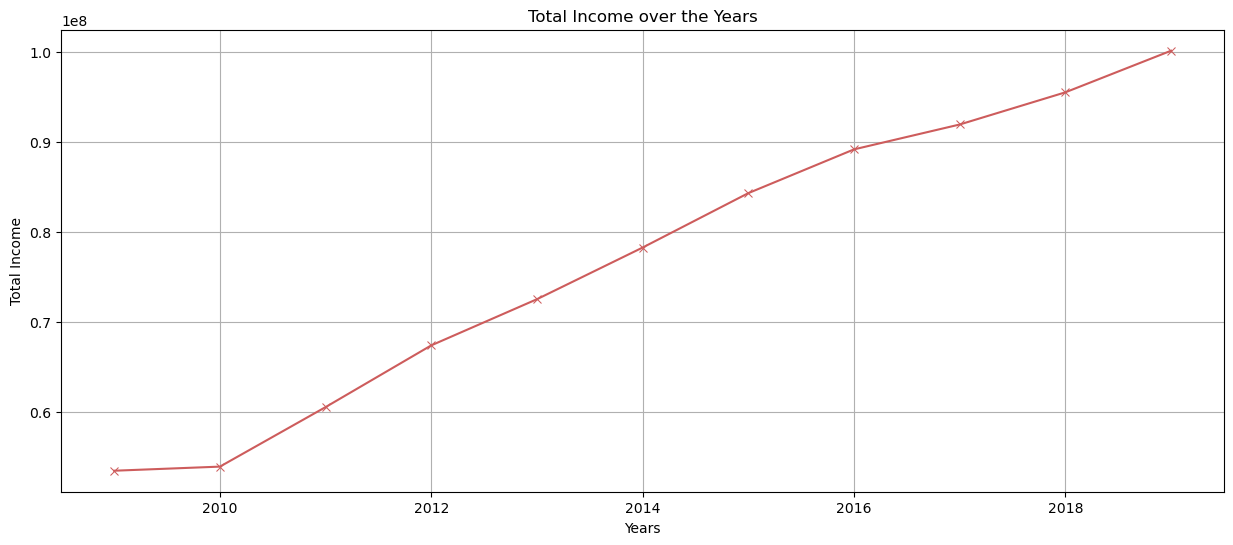

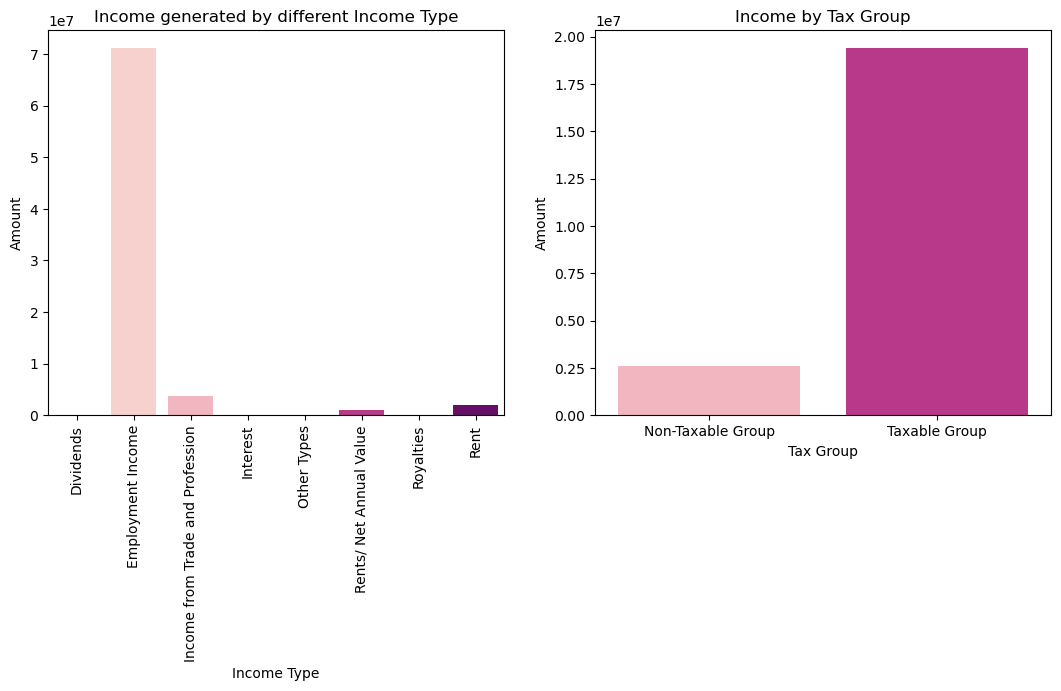

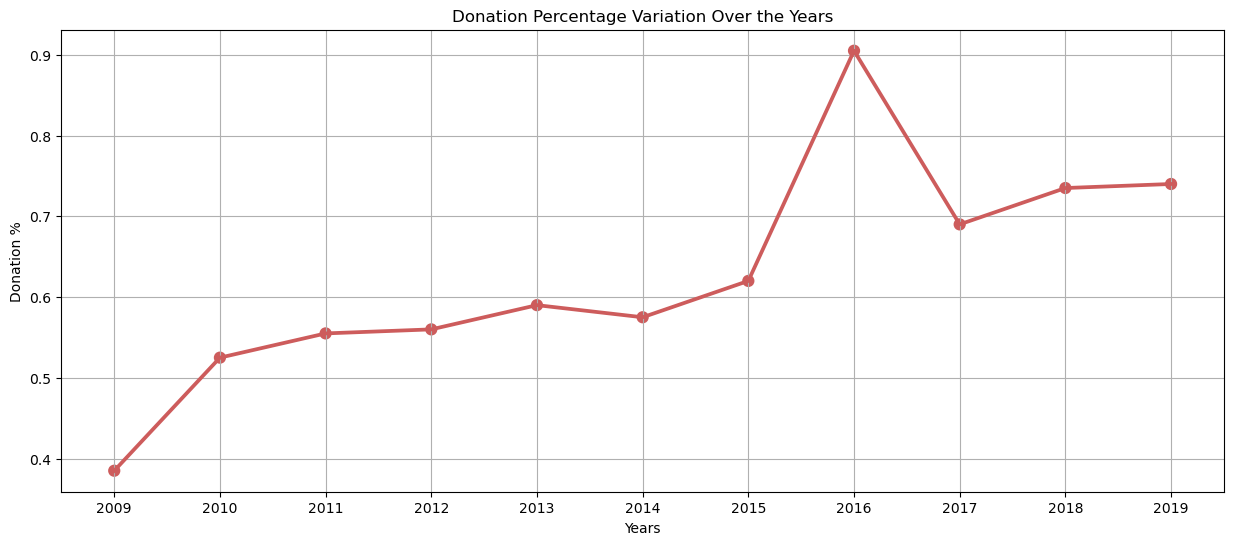


Total Donation made during provided range of years: 8438666 

['Non-Taxable Group' 'Taxable Group']
Enter tax group of your choice or type "Both"Taxable Group


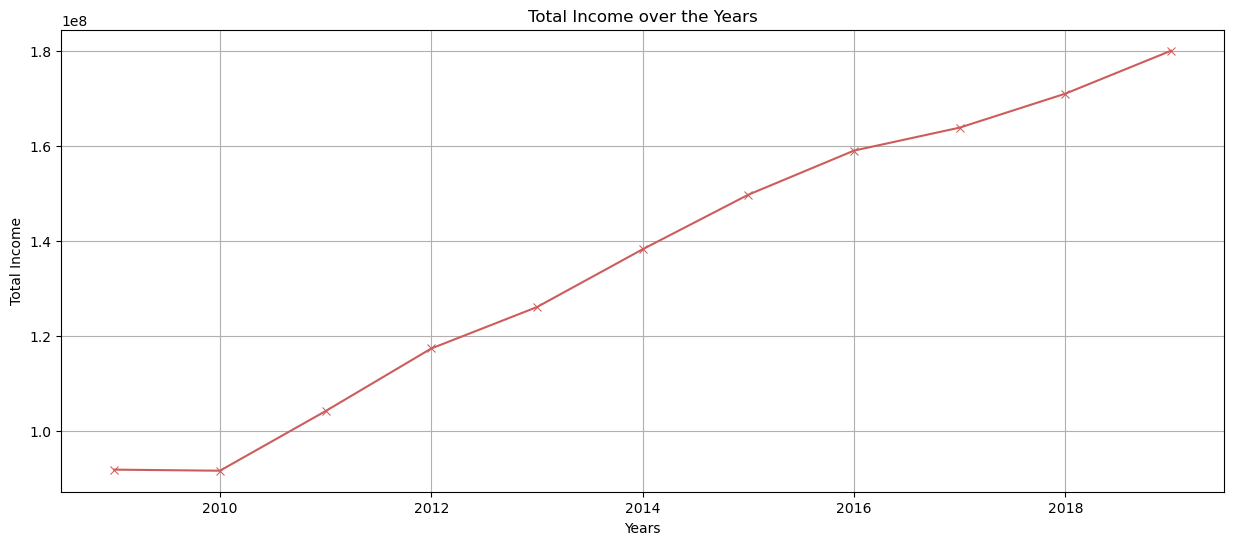

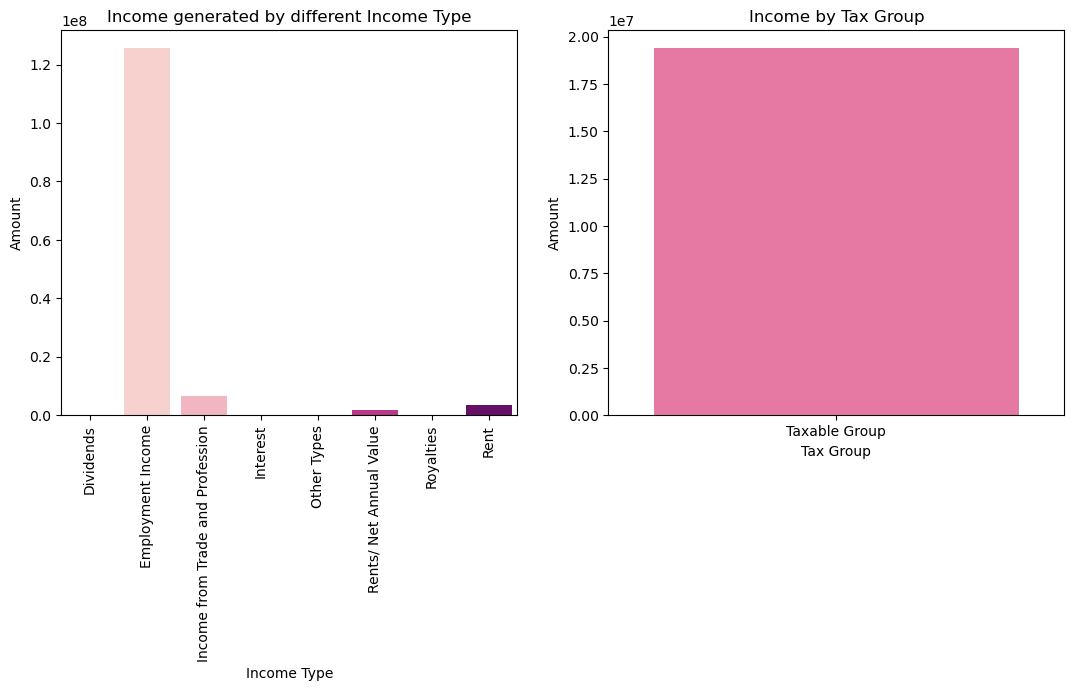

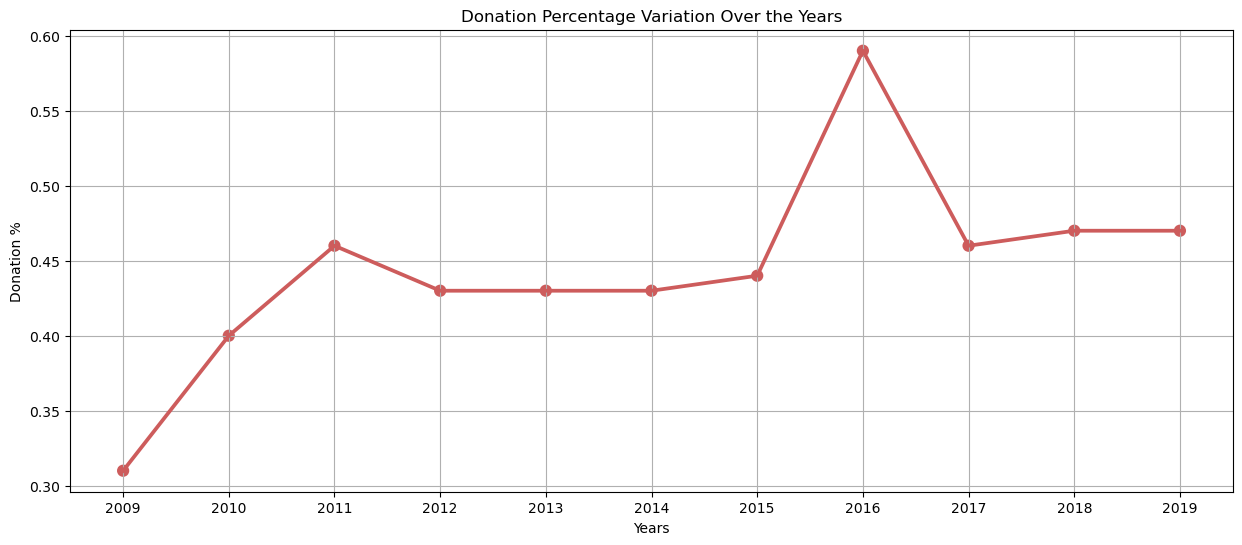


Total Donation made during provided range of years for selected Tax Group: 6779253 



In [12]:
print(df.year_of_assessment.unique(),'\n')
startyr = eval(input('Enter start year of range:'))
endyr = eval(input('Enter end year of range:'))
dfyrrange = df[(df.year_of_assessment >= startyr) & (df.year_of_assessment <= endyr)]
dtyrrange = dt[(dt.year_of_assessment >= startyr) & (dt.year_of_assessment <= endyr)]


inas=dtyrrange.groupby('year_of_assessment')[['no_of_indv_assessed']].sum()
print('\n',inas)

indiassesed = dtyrrange.no_of_indv_assessed.sum()
print('\nNumber of Individuals assessed during provided range of years:', indiassesed,'\n')

fig=plt.figure(figsize=[15,6])
sb.lineplot(x=dtyrrange['year_of_assessment'],y=dtyrrange['total_income'],errorbar=None,marker='x',color='indianred',markeredgecolor='indianred')
plt.title('Total Income over the Years')
plt.xlabel('Years')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()


fig=plt.figure(figsize=[20,5])

a1 = fig.add_subplot(131)
sb.barplot(x=dfyrrange.income_type,y=dfyrrange.amount,errorbar=None,palette='RdPu')
plt.title('Income generated by different Income Type')
plt.xlabel('Income Type')
plt.ylabel('Amount')
plt.xticks(rotation=90)

a2 = fig.add_subplot(132)
sb.barplot(x=dfyrrange.tax_group,y=dfyrrange.amount,errorbar=None,palette='RdPu')
plt.title('Income by Tax Group')
plt.xlabel('Tax Group')
plt.ylabel('Amount')

fig=plt.figure(figsize=[15,6])
sb.pointplot(x=dtyrrange['year_of_assessment'],y=dtyrrange['Donation_Percentage'],errorbar=None,color='indianred')
plt.title('Donation Percentage Variation Over the Years')
plt.xlabel('Years')
plt.ylabel('Donation %')
plt.grid(True)
plt.show()

total_donation= dtyrrange.donations.sum()
print('\nTotal Donation made during provided range of years:', total_donation,'\n')

#############################################
print(dfyrrange.tax_group.unique())
txgrp = input('Enter tax group of your choice or type "Both"')

if txgrp == 'Taxable Group':
    TGf = dfyrrange[dfyrrange.tax_group == txgrp]
    TGt = dtyrrange[dtyrrange.tax_group == txgrp]
elif txgrp == 'Non-Taxable Group':
    TGf = dfyrrange[dfyrrange.tax_group == txgrp]
    TGt = dtyrrange[dtyrrange.tax_group == txgrp]
else:
    print('\nInvalid Input')
    
fig=plt.figure(figsize=[15,6])
sb.lineplot(x=TGt['year_of_assessment'],y=TGt['total_income'],errorbar=None,marker='x',color='indianred',markeredgecolor='indianred')
plt.title('Total Income over the Years')
plt.xlabel('Years')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()

    
fig=plt.figure(figsize=[20,5])

a1 = fig.add_subplot(131)
sb.barplot(x=TGf.income_type,y=TGf.amount,errorbar=None,palette='RdPu')
plt.title('Income generated by different Income Type')
plt.xlabel('Income Type')
plt.ylabel('Amount')
plt.xticks(rotation=90)

a2 = fig.add_subplot(132)
sb.barplot(x=TGf.tax_group,y=TGf.amount,errorbar=None,palette='RdPu')
plt.title('Income by Tax Group')
plt.xlabel('Tax Group')
plt.ylabel('Amount')

fig=plt.figure(figsize=[15,6])
sb.pointplot(x=TGt['year_of_assessment'],y=TGt['Donation_Percentage'],errorbar=None,color='indianred')
plt.title('Donation Percentage Variation Over the Years')
plt.xlabel('Years')
plt.ylabel('Donation %')
plt.grid(True)
plt.show()

tot_donation= TGt.donations.sum()
print('\nTotal Donation made during provided range of years for selected Tax Group:', tot_donation,'\n')